<div style ='text-align: right'> <div style ="font-size:20px"> <b> <header> FIT 1043 Introduction to Data Science <br>
Assignment 2 </b> </header> </div> <br> Johan Azlan <br> 31165001</div>

***

## Introduction
- The goal of this report is to analyse data, wrangle data, using clustering for unsupervised machine learning, using classification for supervised machine learning ands also to experience independant model evaluation. The dataset consists of data for different types of vehicles. These data provided can be used to build models that can predict the accuracy of the type of vehicles. 

### Importing libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

In [20]:
vehicle_classifier = pd.read_csv('FIT1043-vehicle-classifier.csv')
df = vehicle_classifier

In [21]:
df

,Manufacturer,Model,Vehicle_class,Vehicle_alt_class,US_vehicle_type,Engine_size (litres),Horsepower,Wheelbase,Width,Length,Height,Curb_weight,Fuel_capacity,Fuel_efficiency
0,Acura,Integra,Coupe,Sports,Passenger,1.8,140,101.2,67.3,172.4,52.6,2.639,13.2,28.0
1,Acura,TL,Sedan,NaN,Passenger,3.2,225,108.1,70.3,192.9,56.1,3.517,17.2,25.0
2,Acura,CL,Coupe,NaN,Passenger,3.2,225,106.9,70.6,192.0,54.7,3.470,17.2,26.0
3,Acura,RL,Sedan,NaN,Passenger,3.5,210,114.6,71.4,196.6,56.5,3.850,18.0,22.0
4,Audi,A4,Sedan,NaN,Passenger,1.8,150,103.0,68.2,178.0,55.7,2.998,16.4,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Volvo,V40,Sedan,NaN,Passenger,1.9,160,100.5,67.6,176.6,56.1,3.042,15.8,25.0
152,Volvo,S70,Sedan,NaN,Passenger,2.4,168,104.9,69.3,185.9,55.2,3.208,17.9,25.0
153,Volvo,V70,Sedan,NaN,Passenger,2.4,168,104.9,69.3,186.2,56.2,3.259,17.9,25.0
154,Volvo,C70,Coupe,NaN,Passenger,2.3,236,104.9,71.5,185.7,56.3,3.601,18.5,23.0


In [22]:
df.head()

,Manufacturer,Model,Vehicle_class,Vehicle_alt_class,US_vehicle_type,Engine_size (litres),Horsepower,Wheelbase,Width,Length,Height,Curb_weight,Fuel_capacity,Fuel_efficiency
0,Acura,Integra,Coupe,Sports,Passenger,1.8,140,101.2,67.3,172.4,52.6,2.639,13.2,28.0
1,Acura,TL,Sedan,NaN,Passenger,3.2,225,108.1,70.3,192.9,56.1,3.517,17.2,25.0
2,Acura,CL,Coupe,NaN,Passenger,3.2,225,106.9,70.6,192.0,54.7,3.470,17.2,26.0
3,Acura,RL,Sedan,NaN,Passenger,3.5,210,114.6,71.4,196.6,56.5,3.850,18.0,22.0
4,Audi,A4,Sedan,NaN,Passenger,1.8,150,103.0,68.2,178.0,55.7,2.998,16.4,27.0


In [23]:
df.tail() 

,Manufacturer,Model,Vehicle_class,Vehicle_alt_class,US_vehicle_type,Engine_size (litres),Horsepower,Wheelbase,Width,Length,Height,Curb_weight,Fuel_capacity,Fuel_efficiency
151,Volvo,V40,Sedan,NaN,Passenger,1.9,160,100.5,67.6,176.6,56.1,3.042,15.8,25.0
152,Volvo,S70,Sedan,NaN,Passenger,2.4,168,104.9,69.3,185.9,55.2,3.208,17.9,25.0
153,Volvo,V70,Sedan,NaN,Passenger,2.4,168,104.9,69.3,186.2,56.2,3.259,17.9,25.0
154,Volvo,C70,Coupe,NaN,Passenger,2.3,236,104.9,71.5,185.7,56.3,3.601,18.5,23.0
155,Volvo,S80,Sedan,NaN,Passenger,2.9,201,109.9,72.1,189.8,57.2,3.600,21.1,24.0


In [24]:
df.shape 

(156, 14)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Manufacturer          156 non-null    object 
 1   Model                 156 non-null    object 
 2   Vehicle_class         156 non-null    object 
 3   Vehicle_alt_class     23 non-null     object 
 4   US_vehicle_type       156 non-null    object 
 5   Engine_size (litres)  156 non-null    float64
 6   Horsepower            156 non-null    int64  
 7   Wheelbase             156 non-null    float64
 8   Width                 156 non-null    float64
 9   Length                156 non-null    float64
 10  Height                156 non-null    float64
 11  Curb_weight           155 non-null    float64
 12  Fuel_capacity         156 non-null    float64
 13  Fuel_efficiency       154 non-null    float64
dtypes: float64(8), int64(1), object(5)
memory usage: 17.2+ KB


In [26]:
df['Vehicle_alt_class'].unique() #to find nan values

array(['Sports', nan, 'SUV', 'Hatch'], dtype=object)

In [27]:
df['Vehicle_alt_class'].value_counts()

Sports    18
Hatch      4
SUV        1
Name: Vehicle_alt_class, dtype: int64

In [28]:
df['Curb_weight'].unique() #to find nan values

array([2.639, 3.517, 3.47 , 3.85 , 2.998, 3.561, 3.902, 3.179, 3.197,
       3.472, 3.368, 3.543, 3.778, 3.591, 3.978,   nan, 3.843, 3.77 ,
       5.572, 2.676, 3.051, 3.33 , 3.34 , 3.5  , 3.21 , 2.398, 1.895,
       3.389, 2.967, 3.332, 3.452, 2.911, 3.564, 3.567, 2.567, 2.879,
       3.058, 3.489, 3.375, 4.47 , 4.245, 4.298, 3.557, 4.394, 3.533,
       2.468, 3.203, 2.769, 2.564, 3.908, 3.876, 3.761, 4.808, 3.086,
       4.241, 2.339, 2.932, 3.219, 3.857, 4.288, 2.24 , 2.626, 3.072,
       3.342, 3.65 , 3.045, 3.194, 3.88 , 3.373, 3.638, 3.693, 3.89 ,
       5.401, 3.9  , 3.868, 4.121, 5.393, 2.25 , 2.91 , 2.945, 3.443,
       3.131, 4.52 , 3.51 , 2.892, 3.379, 3.958, 3.944, 3.25 , 3.823,
       4.133, 4.125, 3.055, 2.975, 3.213, 4.115, 4.387, 2.593, 3.012,
       3.294, 3.991, 3.947, 3.821, 3.217, 3.102, 3.455, 2.958, 3.967,
       4.068, 3.948, 2.559, 2.942, 3.528, 2.85 , 2.906, 3.091, 3.492,
       3.396, 3.59 , 3.942, 2.778, 3.032, 3.075, 3.28 , 2.99 , 2.332,
       2.367, 2.452,

In [29]:
df['Fuel_efficiency'].unique() #to find nan values

array([28., 25., 26., 22., 27., 21., 24., 23., 15., 33., 45., 29., nan,
       16., 17., 19., 30., 18., 32., 31., 20.])

In [30]:
df.dropna(subset = ['Curb_weight'], inplace = True) #remove the row with nan in Curb_weight
df

,Manufacturer,Model,Vehicle_class,Vehicle_alt_class,US_vehicle_type,Engine_size (litres),Horsepower,Wheelbase,Width,Length,Height,Curb_weight,Fuel_capacity,Fuel_efficiency
0,Acura,Integra,Coupe,Sports,Passenger,1.8,140,101.2,67.3,172.4,52.6,2.639,13.2,28.0
1,Acura,TL,Sedan,NaN,Passenger,3.2,225,108.1,70.3,192.9,56.1,3.517,17.2,25.0
2,Acura,CL,Coupe,NaN,Passenger,3.2,225,106.9,70.6,192.0,54.7,3.470,17.2,26.0
3,Acura,RL,Sedan,NaN,Passenger,3.5,210,114.6,71.4,196.6,56.5,3.850,18.0,22.0
4,Audi,A4,Sedan,NaN,Passenger,1.8,150,103.0,68.2,178.0,55.7,2.998,16.4,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Volvo,V40,Sedan,NaN,Passenger,1.9,160,100.5,67.6,176.6,56.1,3.042,15.8,25.0
152,Volvo,S70,Sedan,NaN,Passenger,2.4,168,104.9,69.3,185.9,55.2,3.208,17.9,25.0
153,Volvo,V70,Sedan,NaN,Passenger,2.4,168,104.9,69.3,186.2,56.2,3.259,17.9,25.0
154,Volvo,C70,Coupe,NaN,Passenger,2.3,236,104.9,71.5,185.7,56.3,3.601,18.5,23.0


In [31]:
df.dropna(subset = ['Fuel_efficiency'], inplace = True) #remove the rows with nan in Fuel_efficiency 
df = df.reset_index(drop=True) #reset the index of the rows 
df 

,Manufacturer,Model,Vehicle_class,Vehicle_alt_class,US_vehicle_type,Engine_size (litres),Horsepower,Wheelbase,Width,Length,Height,Curb_weight,Fuel_capacity,Fuel_efficiency
0,Acura,Integra,Coupe,Sports,Passenger,1.8,140,101.2,67.3,172.4,52.6,2.639,13.2,28.0
1,Acura,TL,Sedan,NaN,Passenger,3.2,225,108.1,70.3,192.9,56.1,3.517,17.2,25.0
2,Acura,CL,Coupe,NaN,Passenger,3.2,225,106.9,70.6,192.0,54.7,3.470,17.2,26.0
3,Acura,RL,Sedan,NaN,Passenger,3.5,210,114.6,71.4,196.6,56.5,3.850,18.0,22.0
4,Audi,A4,Sedan,NaN,Passenger,1.8,150,103.0,68.2,178.0,55.7,2.998,16.4,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Volvo,V40,Sedan,NaN,Passenger,1.9,160,100.5,67.6,176.6,56.1,3.042,15.8,25.0
149,Volvo,S70,Sedan,NaN,Passenger,2.4,168,104.9,69.3,185.9,55.2,3.208,17.9,25.0
150,Volvo,V70,Sedan,NaN,Passenger,2.4,168,104.9,69.3,186.2,56.2,3.259,17.9,25.0
151,Volvo,C70,Coupe,NaN,Passenger,2.3,236,104.9,71.5,185.7,56.3,3.601,18.5,23.0


In [32]:
df.describe() 

,Engine_size (litres),Horsepower,Wheelbase,Width,Length,Height,Curb_weight,Fuel_capacity,Fuel_efficiency
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,3.050327,185.071895,107.422876,71.069281,187.049020,59.250327,3.376797,17.954248,23.856209
std,1.046430,56.729054,7.690309,3.415912,13.402156,7.986857,0.634540,3.925088,4.294149
min,1.000000,55.000000,92.600000,62.600000,149.400000,47.000000,1.895000,10.300000,15.000000
25%,2.300000,148.000000,103.000000,68.500000,177.500000,54.700000,2.967000,15.800000,21.000000
50%,3.000000,175.000000,107.000000,70.400000,186.700000,56.200000,3.340000,17.200000,24.000000
75%,3.500000,215.000000,112.200000,73.100000,194.800000,64.900000,3.821000,19.800000,26.000000
max,8.000000,450.000000,138.700000,79.900000,224.500000,104.500000,5.572000,32.000000,45.000000


#### Description of the data
- The maximum horsepower for a vehicle in the dataset is 450
- The curb_weight indicates the weight of the vehicle without any passengers. This data can be used to inspect the weight of the vehicles
- The vehicle_class shows the types of vehicles in the datset such as sedan, coupe, SUV and others. 
- Wheelbase, width, length and height are useful to find the size of a vehicle
- The minimum fuel capacity is 10.3 
- The mean fuel_efficiency is 23.9

In [33]:
df.nunique()

Manufacturer             30
Model                   152
Vehicle_class             5
Vehicle_alt_class         3
US_vehicle_type           2
Engine_size (litres)     31
Horsepower               65
Wheelbase                87
Width                    75
Length                  125
Height                   89
Curb_weight             145
Fuel_capacity            55
Fuel_efficiency          20
dtype: int64

### Clustering

### 2 a)  

In [34]:
df2 = df.drop('Vehicle_class', 1)
df2 = df2.drop('Vehicle_alt_class', 1)
df2 = df2.drop('US_vehicle_type', 1)
df2

,Manufacturer,Model,Engine_size (litres),Horsepower,Wheelbase,Width,Length,Height,Curb_weight,Fuel_capacity,Fuel_efficiency
0,Acura,Integra,1.8,140,101.2,67.3,172.4,52.6,2.639,13.2,28.0
1,Acura,TL,3.2,225,108.1,70.3,192.9,56.1,3.517,17.2,25.0
2,Acura,CL,3.2,225,106.9,70.6,192.0,54.7,3.470,17.2,26.0
3,Acura,RL,3.5,210,114.6,71.4,196.6,56.5,3.850,18.0,22.0
4,Audi,A4,1.8,150,103.0,68.2,178.0,55.7,2.998,16.4,27.0
...,...,...,...,...,...,...,...,...,...,...,...
148,Volvo,V40,1.9,160,100.5,67.6,176.6,56.1,3.042,15.8,25.0
149,Volvo,S70,2.4,168,104.9,69.3,185.9,55.2,3.208,17.9,25.0
150,Volvo,V70,2.4,168,104.9,69.3,186.2,56.2,3.259,17.9,25.0
151,Volvo,C70,2.3,236,104.9,71.5,185.7,56.3,3.601,18.5,23.0


### 2 b) Un-supervised machine learning 

- Un-supervised machine learning means that all the data is unlabelled and the algorithms learn to inherent structure from the input data.
- The goal is to model the underlying structure or distribution in the data in order to learn more about the data.
- For example, clustering is a type of un-supervised machine learning. Clustering discovers the inherent groupings in the data.

### 2 c) Justify inputs used for clustering 
- The 2 inputs used for this clustering are Fuel_effieciency and Fuel_capacity. 
- Fuel capacity and fuel efficiency are related. Thus, it is easier to group the data into clusters. 
- The data for these 2 inputs are seen to be simillar to a few other data which can then turn into a cluster
- The overall data is quite spreaded out which will make it better for clustering as the main goal of clustering is to group data into different subgroups based on their similarity. 

### 2 d) Clustering using k-means

Text(0, 0.5, 'Fuel_capacity')

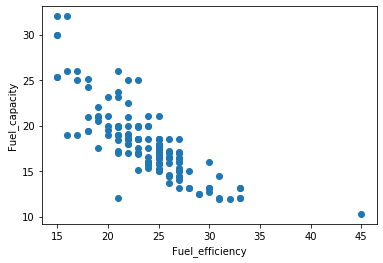

In [35]:
#Visualise the dataset (Vehicle_class vs US_vehicle_type)
plt.scatter(x=df2['Fuel_efficiency'],y=df2['Fuel_capacity'])
plt.xlabel('Fuel_efficiency')
plt.ylabel('Fuel_capacity')

In [36]:
kmeans = KMeans(n_clusters=2).fit(
df2[['Fuel_efficiency','Fuel_capacity']]
)

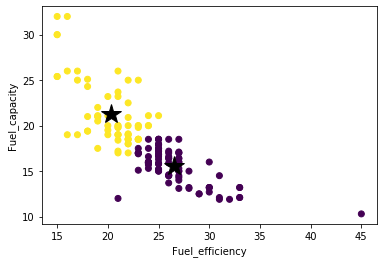

In [37]:
# Visualise the output labels
plt.scatter(
x=df2['Fuel_efficiency'],
y=df2['Fuel_capacity'],
c=kmeans.labels_)

# Visualise the cluster centers (black stars)
plt.plot(
kmeans.cluster_centers_[:,0],
kmeans.cluster_centers_[:,1],
'k*',
markersize=20
)
plt.xlabel('Fuel_efficiency')
plt.ylabel('Fuel_capacity')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=5).fit(
df2[['Fuel_efficiency','Fuel_capacity']]
)

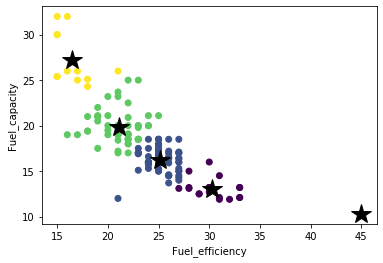

In [39]:
# Visualise the output labels
plt.scatter(
x=df2['Fuel_efficiency'],
y=df2['Fuel_capacity'],
c=kmeans.labels_)

# Visualise the cluster centers (black stars)
plt.plot(
kmeans.cluster_centers_[:,0],
kmeans.cluster_centers_[:,1],
'k*',
markersize=20
)
plt.xlabel('Fuel_efficiency')
plt.ylabel('Fuel_capacity')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=7).fit(
df2[['Fuel_efficiency','Fuel_capacity']]
)

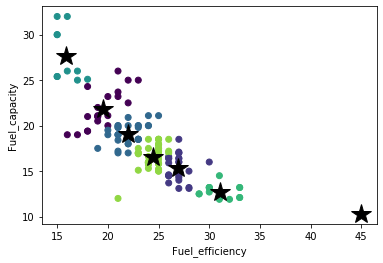

In [41]:
# Visualise the output labels
plt.scatter(
x=df2['Fuel_efficiency'],
y=df2['Fuel_capacity'],
c=kmeans.labels_)

# Visualise the cluster centers (black stars)
plt.plot(
kmeans.cluster_centers_[:,0],
kmeans.cluster_centers_[:,1],
'k*',
markersize=20
)
plt.xlabel('Fuel_efficiency')
plt.ylabel('Fuel_capacity')
plt.show()

### 2 e) Explain clustering output
- The clusters have a pattern where the centroids of each cluster could connect and form a line. 
- Different clusters do not overlap each other. 
- It can be seen that only a few data have a high fuel capacity with a very low fuel efficiency. There is also 1 data which is an outlier that has low fuel capacity and high fuel efficiency. The majority of the data are having a mid-range fuel capacity and fuel efficiency.
- The output shows a decreasing curve. 
- when n_clusters = 7, the clustering will show a better graph because when the centroids are closer together and when joined together then a smooth decreasing curve will be formed. 


### 2 f) improved clustering

In [42]:
df_improved = df2.copy() 

In [43]:
filt = df2['Fuel_efficiency'] < 40
df2[filt]

,Manufacturer,Model,Engine_size (litres),Horsepower,Wheelbase,Width,Length,Height,Curb_weight,Fuel_capacity,Fuel_efficiency
0,Acura,Integra,1.8,140,101.2,67.3,172.4,52.6,2.639,13.2,28.0
1,Acura,TL,3.2,225,108.1,70.3,192.9,56.1,3.517,17.2,25.0
2,Acura,CL,3.2,225,106.9,70.6,192.0,54.7,3.470,17.2,26.0
3,Acura,RL,3.5,210,114.6,71.4,196.6,56.5,3.850,18.0,22.0
4,Audi,A4,1.8,150,103.0,68.2,178.0,55.7,2.998,16.4,27.0
...,...,...,...,...,...,...,...,...,...,...,...
148,Volvo,V40,1.9,160,100.5,67.6,176.6,56.1,3.042,15.8,25.0
149,Volvo,S70,2.4,168,104.9,69.3,185.9,55.2,3.208,17.9,25.0
150,Volvo,V70,2.4,168,104.9,69.3,186.2,56.2,3.259,17.9,25.0
151,Volvo,C70,2.3,236,104.9,71.5,185.7,56.3,3.601,18.5,23.0


Text(0, 0.5, 'Fuel_capacity')

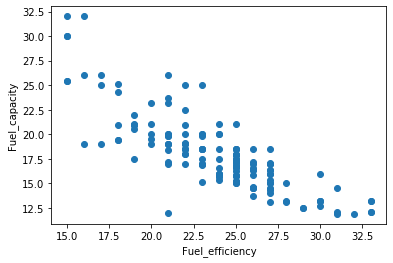

In [44]:
#Visualise the dataset (Vehicle_class vs US_vehicle_type)
plt.scatter(x=df2[filt]['Fuel_efficiency'],y=df2[filt]['Fuel_capacity'])
plt.xlabel('Fuel_efficiency')
plt.ylabel('Fuel_capacity')

In [45]:
kmeans = KMeans(n_clusters=2).fit(
df2[filt][['Fuel_efficiency','Fuel_capacity']]
)

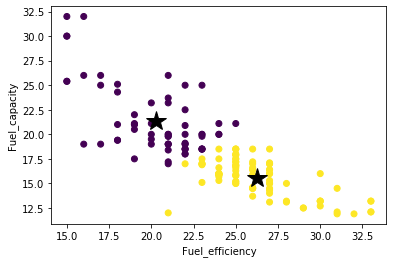

In [46]:
# Visualise the output labels
plt.scatter(
x=df2[filt]['Fuel_efficiency'],
y=df2[filt]['Fuel_capacity'],
c=kmeans.labels_)

# Visualise the cluster centers (black stars)
plt.plot(
kmeans.cluster_centers_[:,0],
kmeans.cluster_centers_[:,1],
'k*',
markersize=20
)
plt.xlabel('Fuel_efficiency')
plt.ylabel('Fuel_capacity')
plt.show()

In [47]:
kmeans = KMeans(n_clusters=5).fit(
df2[filt][['Fuel_efficiency','Fuel_capacity']]
)

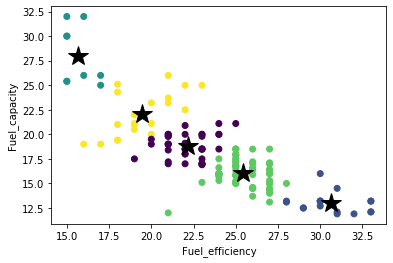

In [48]:
# Visualise the output labels
plt.scatter(
x=df2[filt]['Fuel_efficiency'],
y=df2[filt]['Fuel_capacity'],
c=kmeans.labels_)

# Visualise the cluster centers (black stars)
plt.plot(
kmeans.cluster_centers_[:,0],
kmeans.cluster_centers_[:,1],
'k*',
markersize=20
)
plt.xlabel('Fuel_efficiency')
plt.ylabel('Fuel_capacity')
plt.show()

In [49]:
kmeans = KMeans(n_clusters=7).fit(
df2[filt][['Fuel_efficiency','Fuel_capacity']]
)

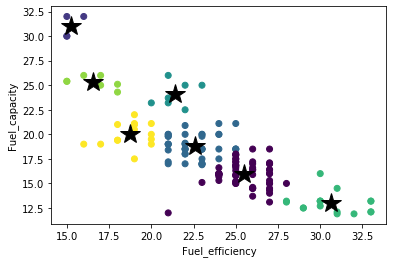

In [51]:
# Visualise the output labels
plt.scatter(
x=df2[filt]['Fuel_efficiency'],
y=df2[filt]['Fuel_capacity'],
c=kmeans.labels_)

# Visualise the cluster centers (black stars)
plt.plot(
kmeans.cluster_centers_[:,0],
kmeans.cluster_centers_[:,1],
'k*',
markersize=20
)
plt.xlabel('Fuel_efficiency')
plt.ylabel('Fuel_capacity')
plt.show()

- The results of the improved data shows a better result than the previous data
- The outlier has been removed 
- The clusters are more grouped together 
- n_clusters = 5 still show a better curve than n_clusters = 7 

### Classification 

#### a) Explain difference between binary and multi-class classification
- Binary class classification is the task of classifying data of a given set into two groups by using the classification rules. 
- Example, to identify a spam. The data consists of spam and not spam. The binary classification is to classify the data based on spam and not spam.
- Multi-class classification is the task of classifying data into many different classes by using the classification rules. 
- Example, Vehicle_class consists of many different data such as coupe, sedan, SUV and more. Vehicle_class will use multi_class classification as it consists of more than 2 groups of data. 


#### b) Explain Supervised machine learning, the notion of labelled data and the training and test datasets
- In supervised machine learning, all data is labelled and the algorithms learns to predict the output from the input data. 
- The goal is to approximate the mapping function so well that when you have new input data, you can predict the output variable for that data. 
- For example, classification is a type of machine learning. The output variable is a category.
- Labelled data is a group of samples that have been tagged with one or more labels. It takes a set of unlabelled data and augments the unlabelled data with meaningful tags that are informative.
- A training dataset is a set of data used to train a model.
- A test dataset is a set of data used to test the trained model.


#### c) Binary classification using decision tree algorithm 

In [60]:
df3 = df[['US_vehicle_type']]
df3['Width'] = df['Width']
df3['Length'] = df['Length']
df3['Height'] = df['Height']
df3

/Users/johanazlan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johanazlan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johanazlan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,US_vehicle_type,Width,Length,Height
0,Passenger,67.3,172.4,52.6
1,Passenger,70.3,192.9,56.1
2,Passenger,70.6,192.0,54.7
3,Passenger,71.4,196.6,56.5
4,Passenger,68.2,178.0,55.7
...,...,...,...,...
148,Passenger,67.6,176.6,56.1
149,Passenger,69.3,185.9,55.2
150,Passenger,69.3,186.2,56.2
151,Passenger,71.5,185.7,56.3


In [61]:
X = df3.iloc[:, [1,2,3]] #Input data: Width, length and height to measure the size of the vehicle
y = df3.iloc[:, 0] #labelled data: US_vehicle_type(passenger or car)

In [62]:
#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.25, random_state = 0
)

In [63]:
# Feature Scaling/Normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
# Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier(
criterion = 'entropy', random_state = 0
)
classifier.fit(X_train, y_train) #classifier is the decision tree algorithm and model created 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [65]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [66]:
# Making the Confusion Matrix 
# to compare y_pred with y_test(Actual value)
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0],
       [ 0, 24]])

- Precision is calculated by using the formula TP/(TP + FP)
- Precision = 15/(15+0)
- The precision of the decision tree algorithm is 100% 
- Specificity is calculated by using the formula TN/(TN + FP)
- Specificity = 24/(24+0)
- The specificity of the decision tree algorithm is 100%

#### d) Multi-class classification using decision tree algorithm 

In [67]:
df4 = df[['Vehicle_class']]
df4['Curb_weight'] = df['Curb_weight']
df4['Wheelbase'] = df['Wheelbase']
df4['Width'] = df['Width']
df4['Length'] = df['Length']
df4['Height'] = df['Height']
df4

/Users/johanazlan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johanazlan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johanazlan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Vehicle_class,Curb_weight,Wheelbase,Width,Length,Height
0,Coupe,2.639,101.2,67.3,172.4,52.6
1,Sedan,3.517,108.1,70.3,192.9,56.1
2,Coupe,3.470,106.9,70.6,192.0,54.7
3,Sedan,3.850,114.6,71.4,196.6,56.5
4,Sedan,2.998,103.0,68.2,178.0,55.7
...,...,...,...,...,...,...
148,Sedan,3.042,100.5,67.6,176.6,56.1
149,Sedan,3.208,104.9,69.3,185.9,55.2
150,Sedan,3.259,104.9,69.3,186.2,56.2
151,Coupe,3.601,104.9,71.5,185.7,56.3


In [68]:
X = df4.iloc[:, [1,2,3,4,5]] #Input data: Curb_weight, width, length, height and wheelbase
y = df4.iloc[:, 0] #labelled data: Vehicle__class

In [69]:
#Split the data into training set and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(
X, y, test_size = 0.25, random_state = 0
)

In [70]:
# Feature Scaling/Normalization
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

In [71]:
# Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier(
criterion = 'entropy', random_state = 0
)
classifier.fit(X_train1, y_train1) #classifier is the decision tree algorithm and model created 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [72]:
# Predicting the Test set results
y_pred1 = classifier.predict(X_test1)

In [73]:
# Making the Confusion Matrix 
# to compare y_pred with y_test(Actual value)
cm = confusion_matrix(y_test1, y_pred1)
cm

array([[ 7,  0,  0,  1,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  1,  6,  0,  0],
       [ 0,  0,  0, 16,  0],
       [ 0,  3,  1,  0,  0]])

In [74]:
from sklearn.metrics import accuracy_score
print("Accuracy for decision tree: ", accuracy_score(y_test1, y_pred1))

Accuracy for decision tree:  0.8461538461538461


- The accuracy of the decision tree can be calculated by using the formula TP+TN/(TP+TN+FP+FN)
- I used Curb_weight, width, length, height and wheelbase to identify the size and weight of the vehicles in order to classify them.

#### e)  Multi-class classification using decision tree algorithm

In [77]:
df5 = df[['Vehicle_alt_class']]
df5['Wheelbase'] = df['Wheelbase']
df5['Length'] = df['Length']
df5['Height'] = df['Height']
df5['Curb_weight'] = df['Curb_weight']
df5['Power_output'] = df['Horsepower'] / df['Engine_size (litres)']
df5['Fuel_capacity'] = df['Fuel_capacity']

/Users/johanazlan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johanazlan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johanazlan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [78]:
df5['Vehicle_alt_class'].fillna(df['Vehicle_class'], inplace=True) #fill NaN with the values from Vehicle_class
df5

/Users/johanazlan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Vehicle_alt_class,Wheelbase,Length,Height,Curb_weight,Power_output,Fuel_capacity
0,Sports,101.2,172.4,52.6,2.639,77.777778,13.2
1,Sedan,108.1,192.9,56.1,3.517,70.312500,17.2
2,Coupe,106.9,192.0,54.7,3.470,70.312500,17.2
3,Sedan,114.6,196.6,56.5,3.850,60.000000,18.0
4,Sedan,103.0,178.0,55.7,2.998,83.333333,16.4
...,...,...,...,...,...,...,...
148,Sedan,100.5,176.6,56.1,3.042,84.210526,15.8
149,Sedan,104.9,185.9,55.2,3.208,70.000000,17.9
150,Sedan,104.9,186.2,56.2,3.259,70.000000,17.9
151,Coupe,104.9,185.7,56.3,3.601,102.608696,18.5


In [79]:
df5['Vehicle_alt_class'].value_counts()

Sedan     81
SUV       24
Sports    18
Coupe      9
MPV        9
Truck      8
Hatch      4
Name: Vehicle_alt_class, dtype: int64

In [80]:
X = df5.iloc[:, [1,2,3,4,5,6]].values #Input data: Wheelbase, length, height, Curb_weight, power output and fuel capacity 
y = df5.iloc[:, 0].values #labelled data: Vehicle_alt_class

In [81]:
#Split the data into training set and test set
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
X, y, test_size = 0.25, random_state = 0
)

In [82]:
# Feature Scaling/Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [83]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
criterion = 'entropy', random_state = 0
)
classifier.fit(X_train2, y_train2) #classifier is the decision tree algorithm and model created 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [84]:
# Predicting the Test set results
y_pred2 = classifier.predict(X_test2)

In [85]:
# Making the Confusion Matrix 
# to compare y_pred with y_test(Actual value)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, y_pred2)
cm

array([[ 1,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0],
       [ 0,  0,  7,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  0],
       [ 1,  0,  0,  1,  5,  0],
       [ 0,  1,  2,  0,  0,  1]])

In [86]:
print("Accuracy for decision tree: ", accuracy_score(y_test2, y_pred2))

Accuracy for decision tree:  0.8717948717948718


- The accuracy of the decision tree can be calculated by using the formula TP+TN/(TP+TN+FP+FN)
- For classifying vehicle_alt_class, i added more data such as power output and fuel capacity because there are more groups to classify. 
- Power output because it can be used to identify if it is a sports car or a truck as their power output might be very different from each other.
- Fuel capacity because bigger vehicles might have bigger fuel capacity then smaller vehicles.
- I replaced the NaN values with the values from the vehicle_class as the data after removing the NaN values are not a lot. I find that after i replace the values, it is easier to classify as there are more data for some groups with small amount of data. This will make it easier to classify and increase the accuracy.

#### f) Output the results of 3c, d and e in a csv file

#### 3c to csv

In [87]:
binary = y_pred
binary = pd.DataFrame({'Id': np.arange(1, len(binary)+1), 'Predicted': binary[:]})
binary.to_csv('binary_US_vehicle_type.csv', index = False, sep = ",")

#### 3d to csv

In [88]:
multi_class = y_pred1
multi_class = pd.DataFrame({'Id': np.arange(1, len(multi_class)+1), 'Predicted': multi_class[:]})
multi_class.to_csv('multi_class_Vehicle_class.csv', index = False, sep = ",")

#### 3e to csv

In [89]:
multi_class2 = y_pred2
multi_class2 = pd.DataFrame({'Id': np.arange(1, len(multi_class2)+1), 'Predicted': multi_class2[:]})
multi_class2.to_csv('multi_class_Vehicle_alt_class.csv', index = False, sep = ",")

#### g) Decide on the evaluation metrics and explain how you evaluated your output
- The evaluation metrics that i think is suitable is accuracy and precision.
- For binary class classification, i used precision and specificity. 
- Precision because i want to be very sure of my prediction that passenger and car are not mixed up.
- So it is used to see how often the correct values are predicted correctly.
- Specificity because i want to know how often is the prediction of a negative value correct.
- For multi-class classification, i used accuracy. 
- Accuracy because there are many different classes. I want to know how often is the prediction correct for each vehicle as the goal is to classify the vehicles.

## Question 4: Conclusion

### a) Random Forest Algorithm for 3d

In [94]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(
n_estimators = 20, 
criterion = 'entropy',
random_state = 0
)
classifier.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [95]:
# Predicting the Test set results
y_pred1 = classifier.predict(X_test1)

In [96]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred1)
cm 

array([[ 5,  0,  0,  3,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  1,  6,  0,  0],
       [ 0,  0,  0, 16,  0],
       [ 0,  0,  1,  0,  3]])

In [97]:
print("Accuracy for decision tree: ", accuracy_score(y_test1, y_pred1))

Accuracy for decision tree:  0.8717948717948718


- Random forest algorithm has an accuracy of 0.872 which is a better result of the decision tree algorithm which has an accuracy of 0.846
- Random forest are more accurate because it consists of multiple single trees based on a random sample of the training data. 

### Kaggle 

In [98]:
kaggle_train_data = pd.read_csv('FIT1043-kaggle-train-data.csv')
df_train = kaggle_train_data

In [99]:
df_train.dropna(subset = ['Curb_weight'], inplace = True) #remove the row with nan in Curb_weight
df_train.dropna(subset = ['Fuel_efficiency'], inplace = True) #remove the rows with nan in Fuel_efficiency 
df_train = df_train.reset_index(drop=True) #reset the index of the rows 
df_train

,Id,Vehicle_class,Engine_size (litres),Horsepower,Wheelbase,Width,Length,Height,Curb_weight,Fuel_capacity,Fuel_efficiency
0,1,Coupe,1.8,140,101.2,67.3,172.4,52.6,2.639,13.2,28.0
1,2,Sedan,3.2,225,108.1,70.3,192.9,56.1,3.517,17.2,25.0
2,3,Coupe,3.2,225,106.9,70.6,192.0,54.7,3.470,17.2,26.0
3,4,Sedan,3.5,210,114.6,71.4,196.6,56.5,3.850,18.0,22.0
4,5,Sedan,1.8,150,103.0,68.2,178.0,55.7,2.998,16.4,27.0
...,...,...,...,...,...,...,...,...,...,...,...
148,152,Sedan,1.9,160,100.5,67.6,176.6,56.1,3.042,15.8,25.0
149,153,Sedan,2.4,168,104.9,69.3,185.9,55.2,3.208,17.9,25.0
150,154,Sedan,2.4,168,104.9,69.3,186.2,56.2,3.259,17.9,25.0
151,155,Coupe,2.3,236,104.9,71.5,185.7,56.3,3.601,18.5,23.0


In [100]:
kaggle_test_data = pd.read_csv('FIT1043-kaggle-test-data.csv')
df_test = kaggle_test_data

In [102]:
df_test.dropna(subset = ['Curb_weight'], inplace = True) #remove the row with nan in Curb_weight
df_test.dropna(subset = ['Fuel_efficiency'], inplace = True) #remove the rows with nan in Fuel_efficiency 
df_test = df_test.reset_index(drop=True) #reset the index of the rows 

In [103]:
X = df_train.iloc[:, [4,5,6,7,8]].values #Input data: Curb_weight of the vehicle
y = df_train.iloc[:, 1].values #labelled data: Vehicle__class

In [104]:
df_test = df_test.iloc[:, [3,4,5,6,7]].values #Input data: Curb_weight of the vehicle

In [105]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
X, y, test_size = 0.25, random_state = 0
)

In [106]:
classifier.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [107]:
y_pred1 = classifier.predict(df_test)

In [108]:
Kaggle = y_pred1
Kaggle = pd.DataFrame({'Id': np.arange(1, len(Kaggle)+1), 'Predicted': Kaggle[:]})
Kaggle.to_csv('31165001_Johan_Azlan.csv', index = False, sep = ",")

### b) Conclusion 
- As a conclusion, the most accurate classification method is by using random forest.
- Clustering is a good tool to group input data together based on their similarity.
- Clustering using different n_clusters will show different results.
- Removing outliers during clustering is important for a more accurate cluster.
- Wrangling the data is very important to produce consistent and accurate results during clustering and classification
- Choosing good input variables are important to produce high accuracy results for multi-class classification.
